In [1]:
import sys
import datetime
import pandas as pd

path_root = '../../..'
sys.path.append(f'{path_root}/')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = 'p.a. trento'

path_data = f'{path_root}/data'
path_img_root = f'{path_data}/imgs/grafici/{level}/{region_name}'
path_csv = f'{path_data}/csv'
csv_in_name = f'{path_csv}/{level}/covid19-{region_name}.csv'

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,22,P.A. Trento,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
1,2020-02-26T18:00:00,22,P.A. Trento,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
2,2020-02-27T18:00:00,22,P.A. Trento,0,0,0,0,0,0,0,...,0.0,29.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
3,2020-02-28T18:00:00,22,P.A. Trento,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
4,2020-02-29T17:00:00,22,P.A. Trento,0,0,0,0,0,0,0,...,0.0,11.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,2021-04-23T17:00:00,22,P.A. Trento,91,26,117,1122,1239,11,96,...,0.0,2439.0,259.0,19.0,22.22,9.44,3.94,37.07,0.00,0.90
424,2021-04-24T17:00:00,22,P.A. Trento,78,25,103,1119,1222,-17,75,...,1.0,2637.0,293.0,-3.0,24.27,8.43,2.84,25.60,-3.85,-1.37
425,2021-04-25T17:00:00,22,P.A. Trento,85,27,112,1091,1203,-19,91,...,0.0,1850.0,298.0,-28.0,24.11,9.31,4.92,30.54,8.00,-1.55
426,2021-04-26T17:00:00,22,P.A. Trento,89,26,115,1045,1160,-43,16,...,1.0,428.0,103.0,-46.0,22.61,9.91,3.74,15.53,-3.70,-3.57


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 4, 27, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 89
Nuovi tamponi: 2482.0
Percentuale nuovi positivi/nuovi tamponi: 3.5999999999999996 %
Nuovi guariti: 186.0
Nuovi deceduti: 3.0
Variazione positivi ricoverati con sintomi: -7.0
Variazione positivi in terapia intensiva: -2.0
Variazione positivi in isolamento dimiciliare: -91.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 4, 27, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-02-26T17:00:00,22,P.A. Trento,173,38,211,3310,3521,206,351,...,1.0,3475.0,391.0,199.0,18.01,5.99,10.10,89.77,5.56,6.21
1,2021-02-27T17:00:00,22,P.A. Trento,173,38,211,3444,3655,134,341,...,2.0,4011.0,577.0,134.0,18.01,5.77,8.50,59.10,0.00,3.81
2,2021-02-28T17:00:00,22,P.A. Trento,185,39,224,3709,3933,278,329,...,0.0,2714.0,440.0,265.0,17.41,5.70,12.12,74.77,2.63,7.61
3,2021-03-01T17:00:00,22,P.A. Trento,190,42,232,3465,3697,-236,57,...,2.0,1143.0,368.0,-244.0,18.10,6.28,4.99,15.49,7.69,-6.00
4,2021-03-02T17:00:00,22,P.A. Trento,191,42,233,3435,3668,-29,220,...,1.0,3060.0,465.0,-30.0,18.03,6.35,7.19,47.31,0.00,-0.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2021-04-23T17:00:00,22,P.A. Trento,91,26,117,1122,1239,11,96,...,0.0,2439.0,259.0,19.0,22.22,9.44,3.94,37.07,0.00,0.90
57,2021-04-24T17:00:00,22,P.A. Trento,78,25,103,1119,1222,-17,75,...,1.0,2637.0,293.0,-3.0,24.27,8.43,2.84,25.60,-3.85,-1.37
58,2021-04-25T17:00:00,22,P.A. Trento,85,27,112,1091,1203,-19,91,...,0.0,1850.0,298.0,-28.0,24.11,9.31,4.92,30.54,8.00,-1.55
59,2021-04-26T17:00:00,22,P.A. Trento,89,26,115,1045,1160,-43,16,...,1.0,428.0,103.0,-46.0,22.61,9.91,3.74,15.53,-3.70,-3.57


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

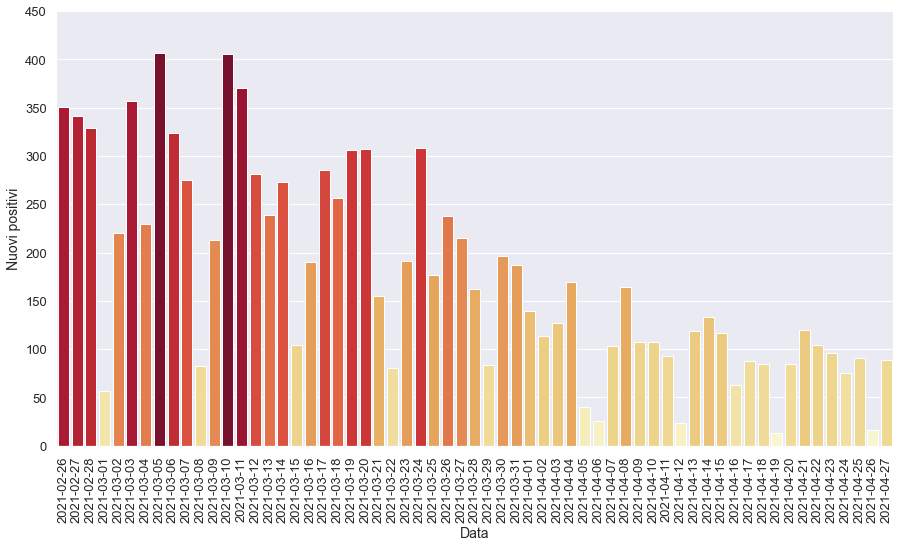

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

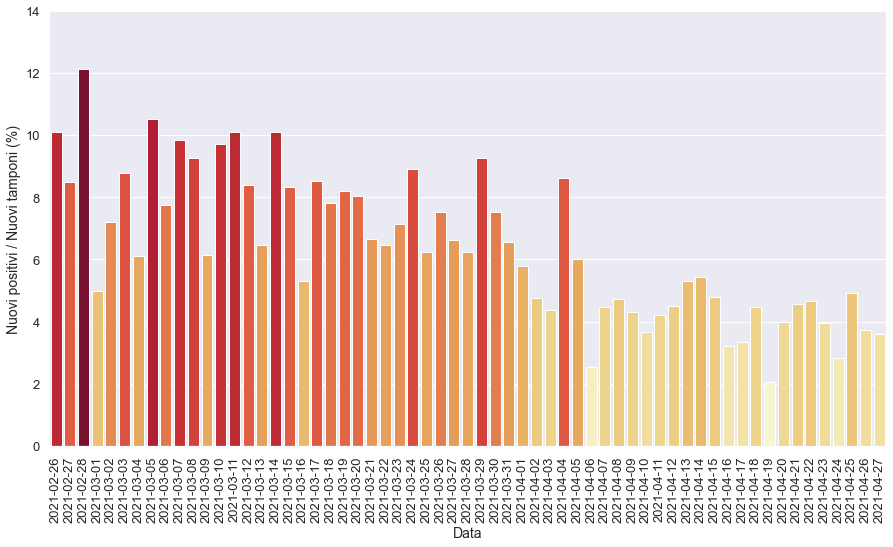

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

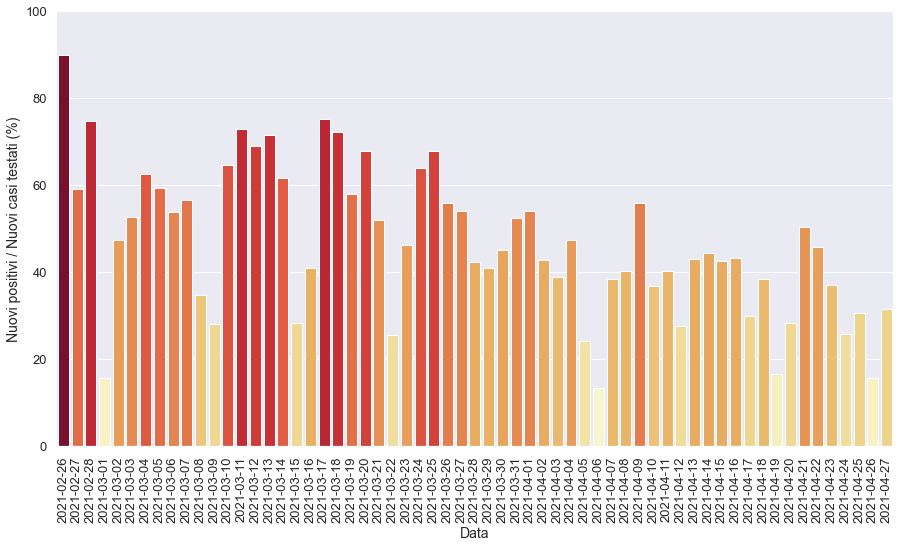

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

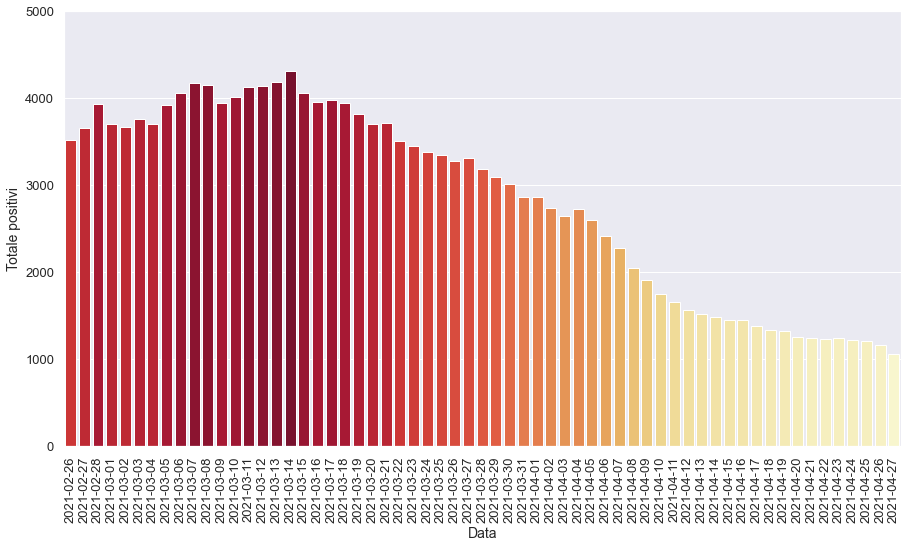

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

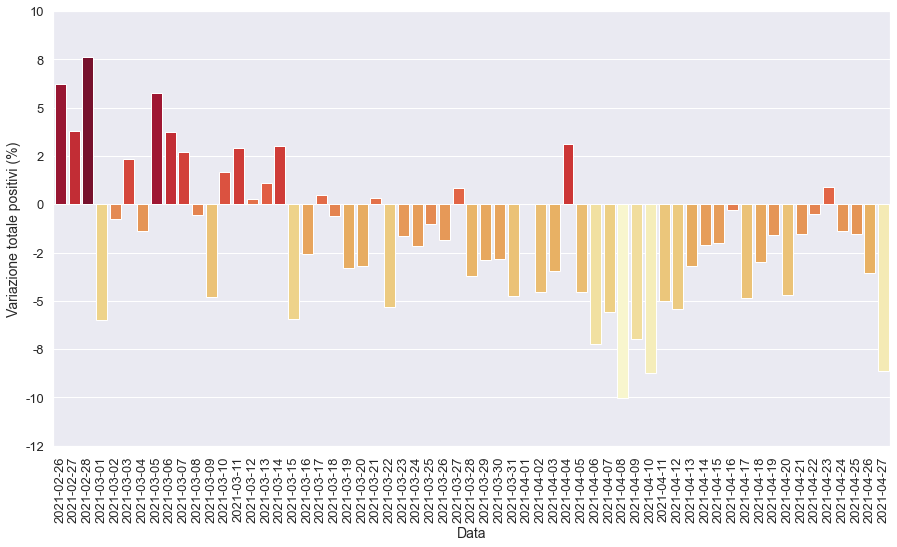

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

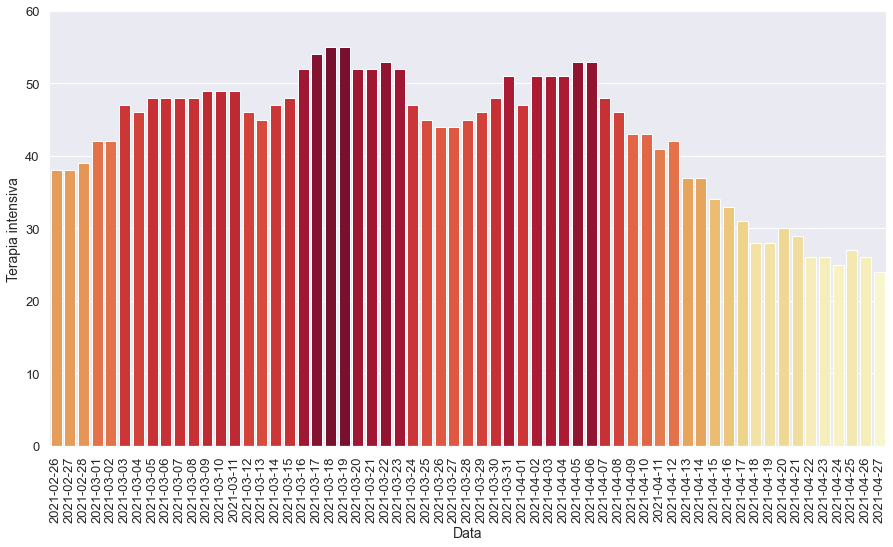

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

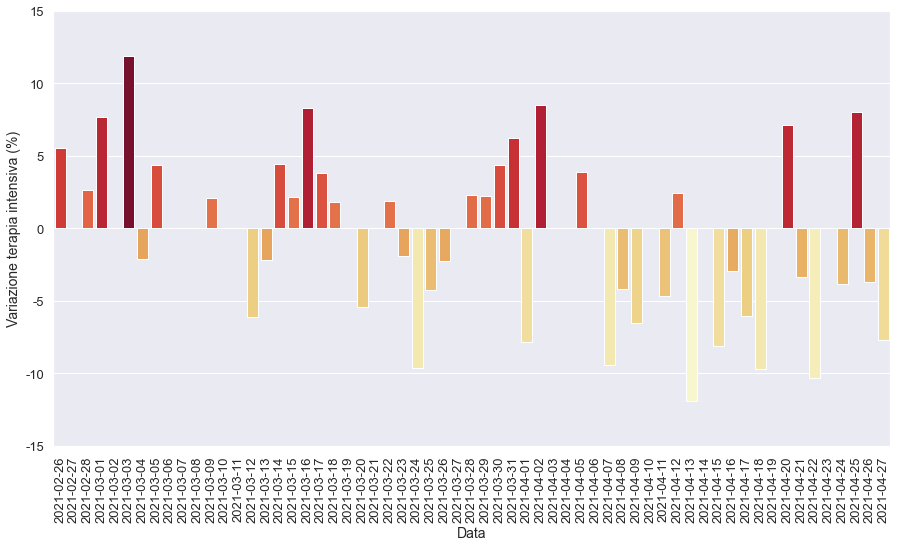

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

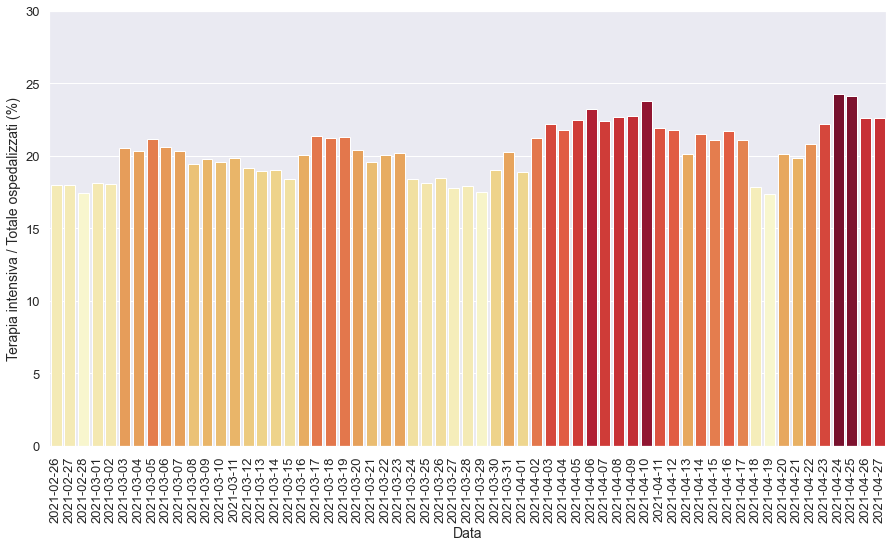

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

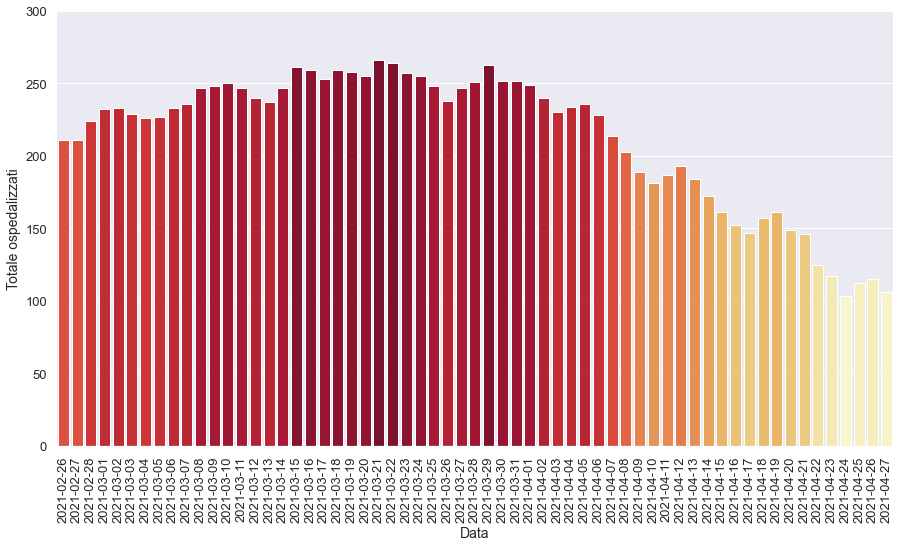

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

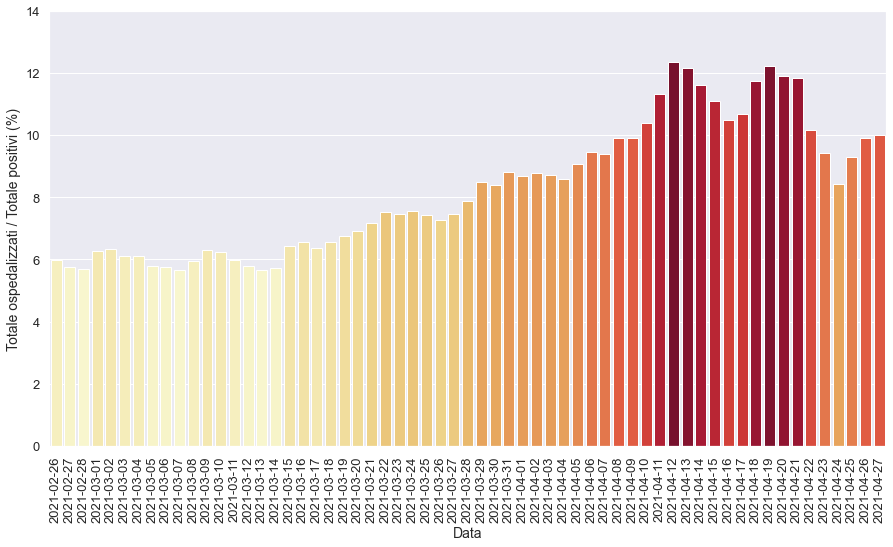

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

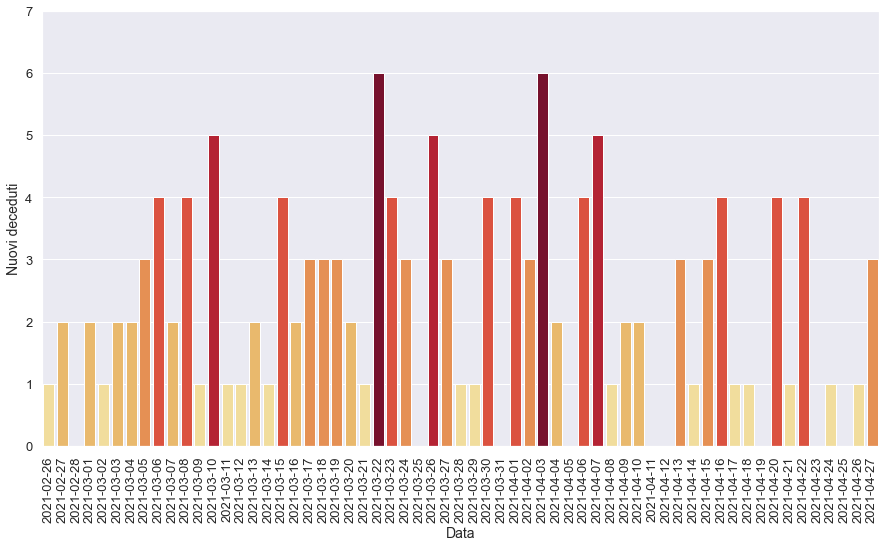

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

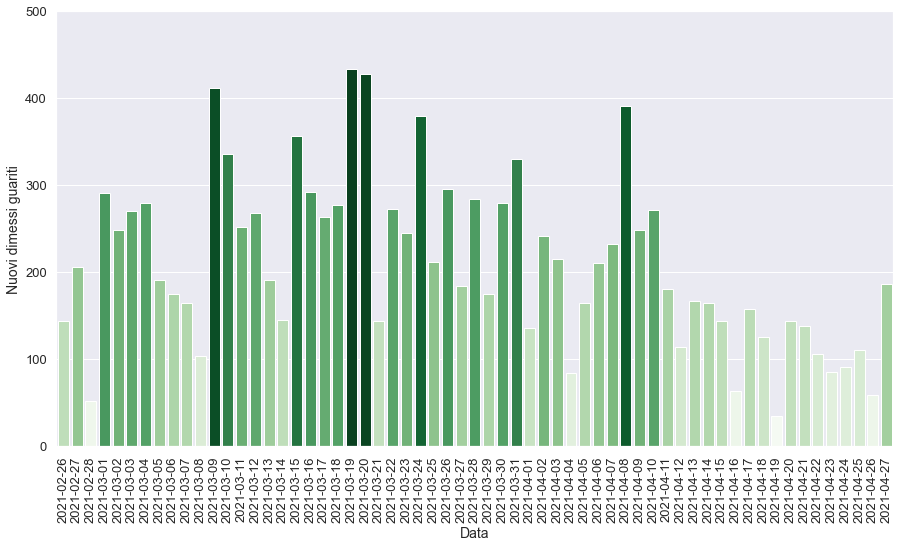

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-03-28T17:00:00,22,P.A. Trento,206,45,251,2934,3185,-123,162,...,1.0,2590.0,384.0,-127.0,17.93,7.88,6.25,42.19,2.27,-3.72
1,2021-03-29T17:00:00,22,P.A. Trento,217,46,263,2830,3093,-92,84,...,1.0,905.0,206.0,-104.0,17.49,8.50,9.28,40.78,2.22,-2.89
2,2021-03-30T17:00:00,22,P.A. Trento,204,48,252,2754,3006,-87,196,...,4.0,2607.0,436.0,-76.0,19.05,8.38,7.52,44.95,4.35,-2.81
3,2021-03-31T17:00:00,22,P.A. Trento,201,51,252,2611,2863,-143,187,...,0.0,2849.0,357.0,-143.0,20.24,8.80,6.56,52.38,6.25,-4.76
4,2021-04-01T17:00:00,22,P.A. Trento,202,47,249,2615,2864,1,140,...,4.0,2414.0,259.0,4.0,18.88,8.69,5.80,54.05,-7.84,0.03
5,2021-04-02T17:00:00,22,P.A. Trento,189,51,240,2494,2734,-130,114,...,3.0,2395.0,267.0,-121.0,21.25,8.78,4.76,42.70,8.51,-4.54
6,2021-04-03T17:00:00,22,P.A. Trento,179,51,230,2410,2640,-94,127,...,6.0,2904.0,327.0,-84.0,22.17,8.71,4.37,38.84,0.00,-3.44
7,2021-04-04T17:00:00,22,P.A. Trento,183,51,234,2489,2723,83,169,...,2.0,1959.0,358.0,79.0,21.79,8.59,8.63,47.21,0.00,3.14
8,2021-04-05T17:00:00,22,P.A. Trento,183,53,236,2363,2599,-124,40,...,0.0,666.0,166.0,-126.0,22.46,9.08,6.01,24.10,3.92,-4.55
9,2021-04-06T17:00:00,22,P.A. Trento,175,53,228,2183,2411,-188,26,...,4.0,1018.0,196.0,-180.0,23.25,9.46,2.55,13.27,0.00,-7.23


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

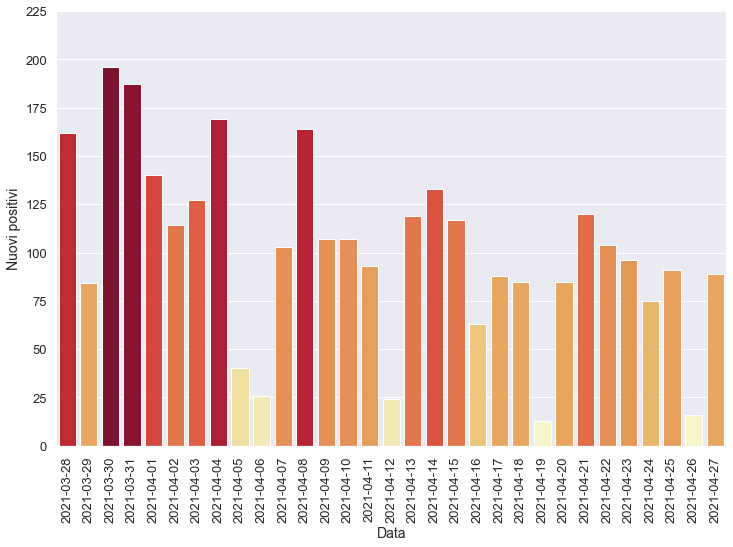

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

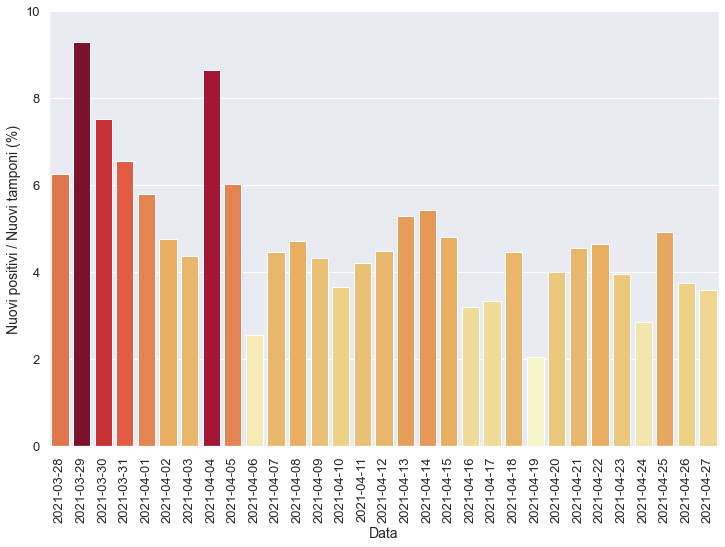

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

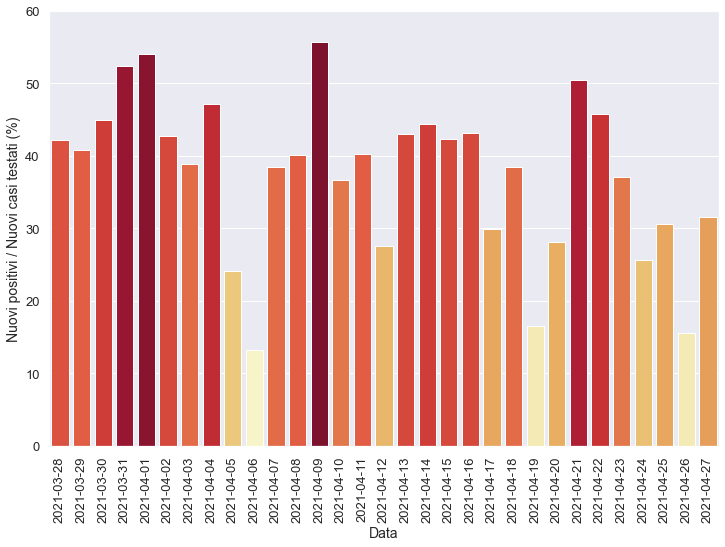

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

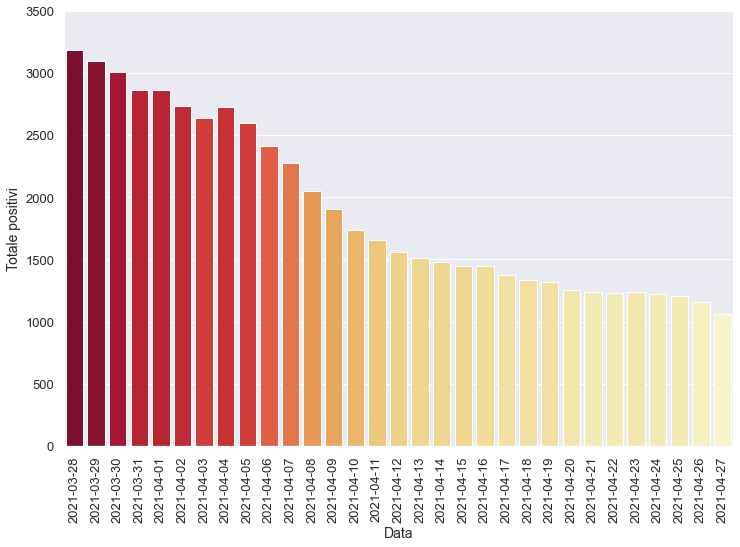

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

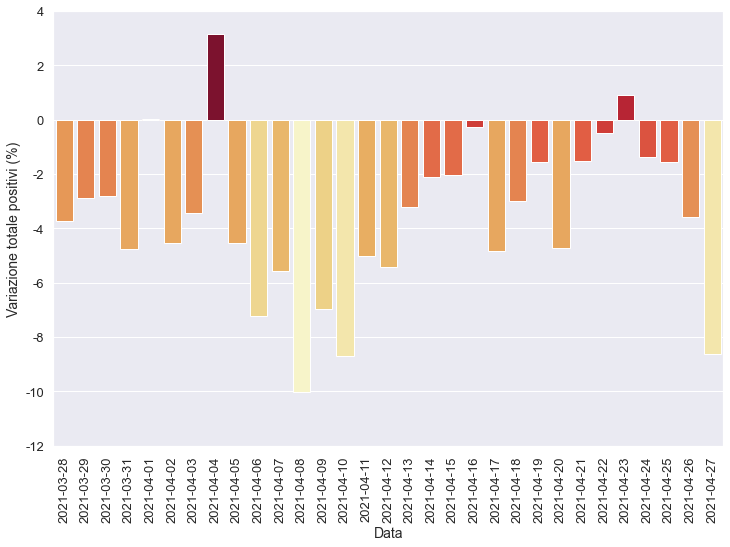

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

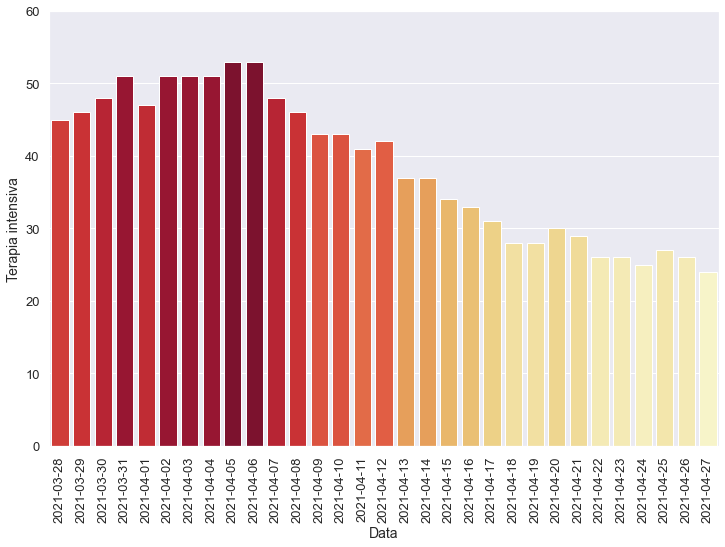

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

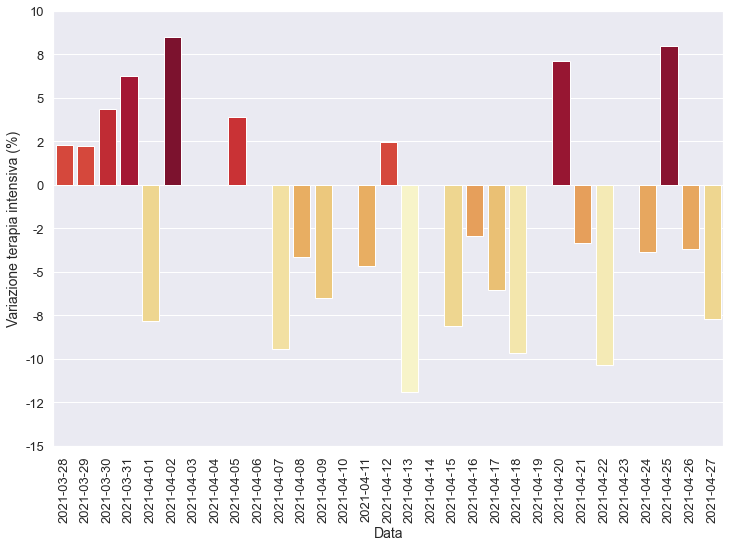

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

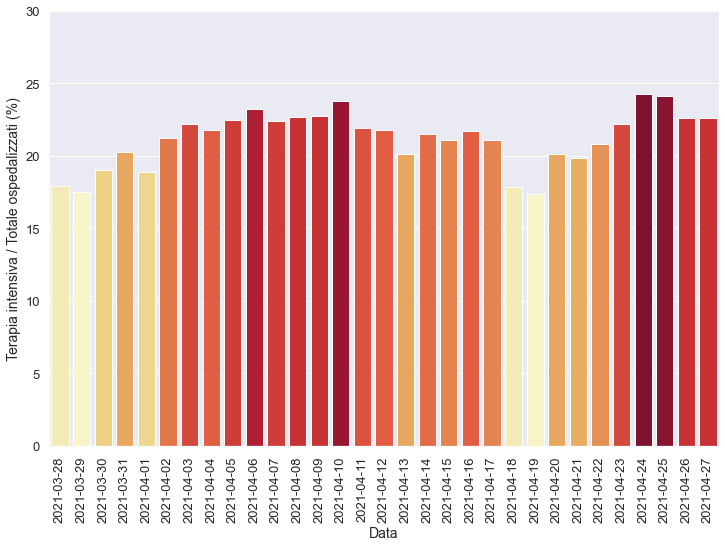

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

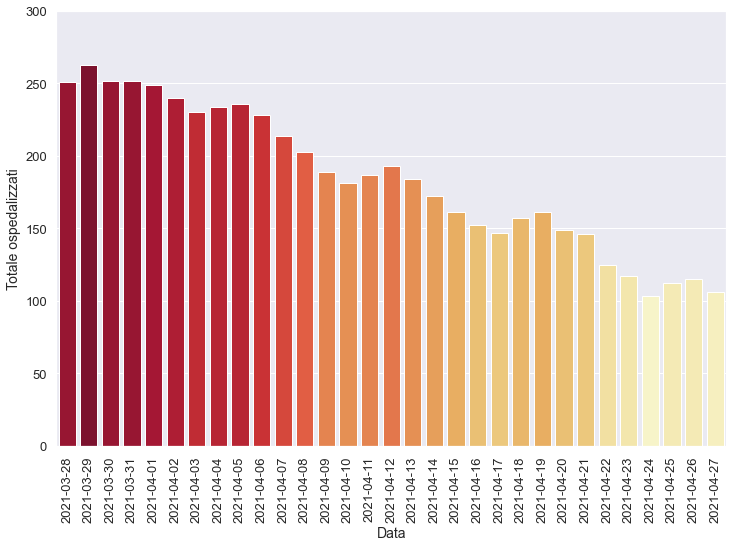

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

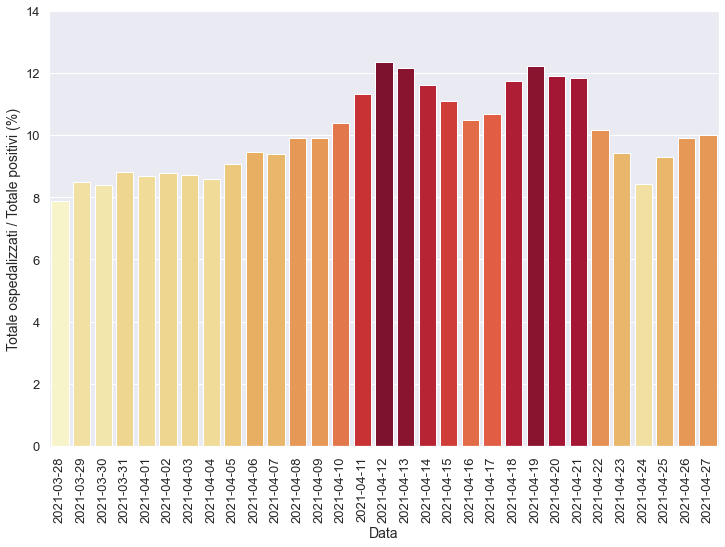

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

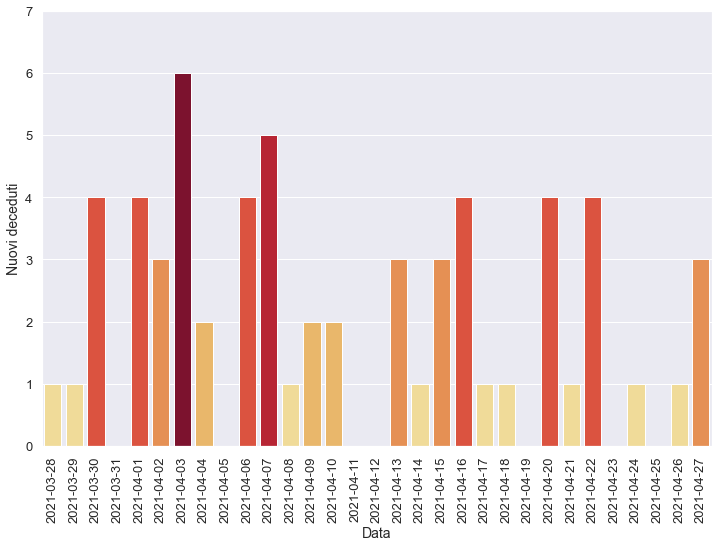

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

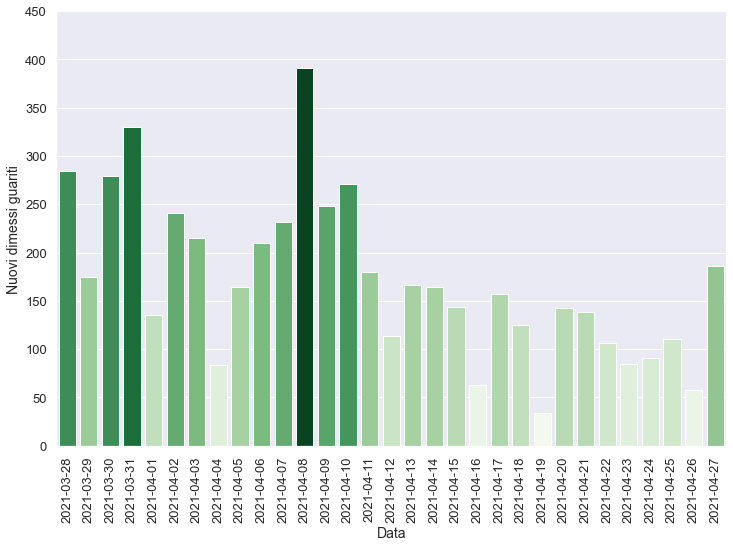

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-04-20T17:00:00,22,P.A. Trento,119,30,149,1104,1253,-62,85,...,4.0,2123.0,302.0,-50.0,20.13,11.89,4.00,28.15,7.14,-4.71
1,2021-04-21T17:00:00,22,P.A. Trento,117,29,146,1088,1234,-19,120,...,1.0,2635.0,238.0,-16.0,19.86,11.83,4.55,50.42,-3.33,-1.52
2,2021-04-22T17:00:00,22,P.A. Trento,99,26,125,1103,1228,-6,104,...,4.0,2235.0,227.0,15.0,20.80,10.18,4.65,45.81,-10.34,-0.49
3,2021-04-23T17:00:00,22,P.A. Trento,91,26,117,1122,1239,11,96,...,0.0,2439.0,259.0,19.0,22.22,9.44,3.94,37.07,0.00,0.90
4,2021-04-24T17:00:00,22,P.A. Trento,78,25,103,1119,1222,-17,75,...,1.0,2637.0,293.0,-3.0,24.27,8.43,2.84,25.60,-3.85,-1.37
5,2021-04-25T17:00:00,22,P.A. Trento,85,27,112,1091,1203,-19,91,...,0.0,1850.0,298.0,-28.0,24.11,9.31,4.92,30.54,8.00,-1.55
6,2021-04-26T17:00:00,22,P.A. Trento,89,26,115,1045,1160,-43,16,...,1.0,428.0,103.0,-46.0,22.61,9.91,3.74,15.53,-3.70,-3.57
7,2021-04-27T17:00:00,22,P.A. Trento,82,24,106,954,1060,-100,89,...,3.0,2482.0,282.0,-91.0,22.64,10.00,3.59,31.56,-7.69,-8.62


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

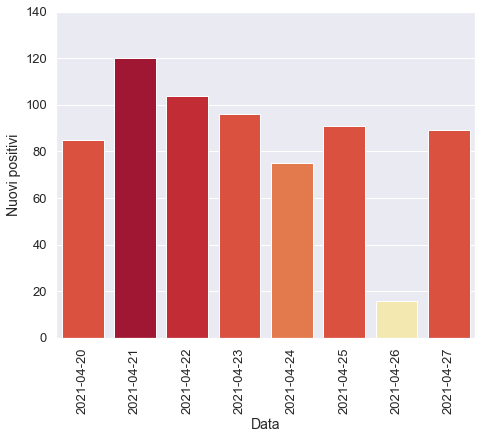

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

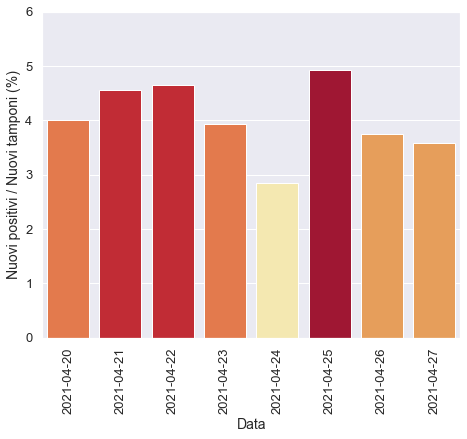

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

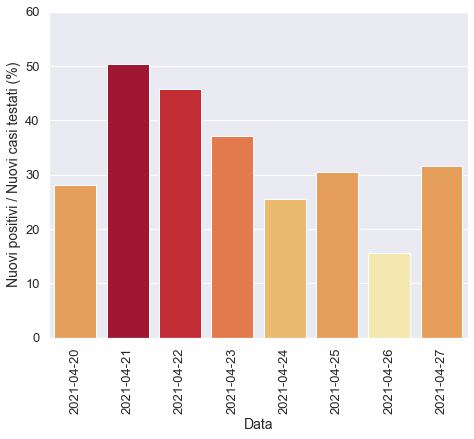

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

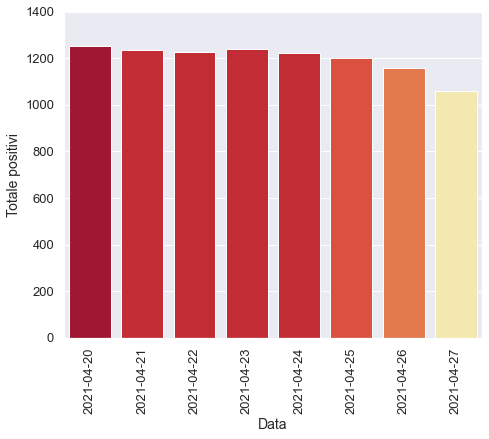

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

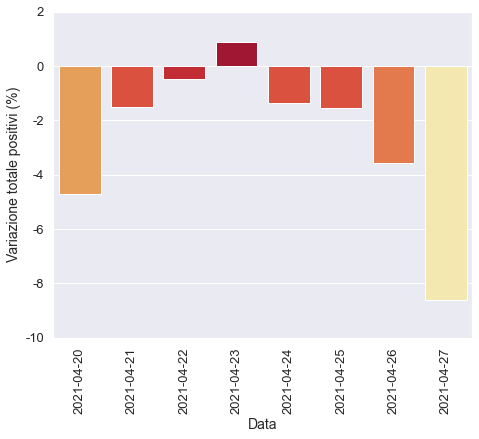

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

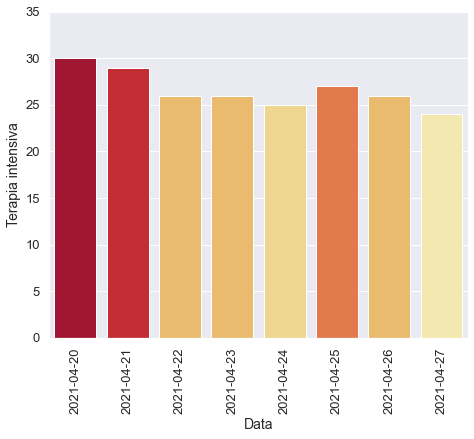

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

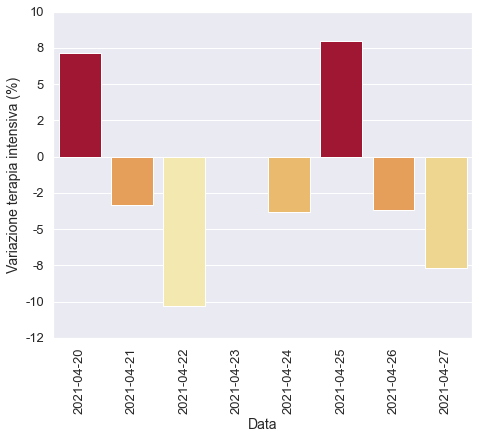

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

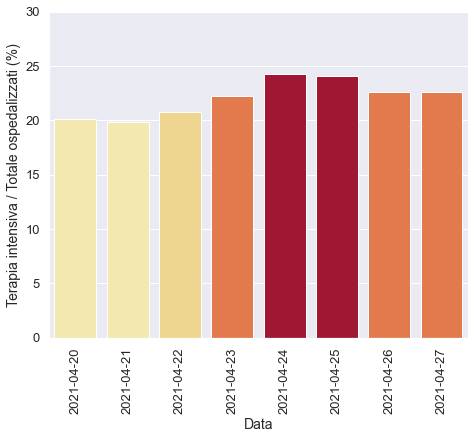

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

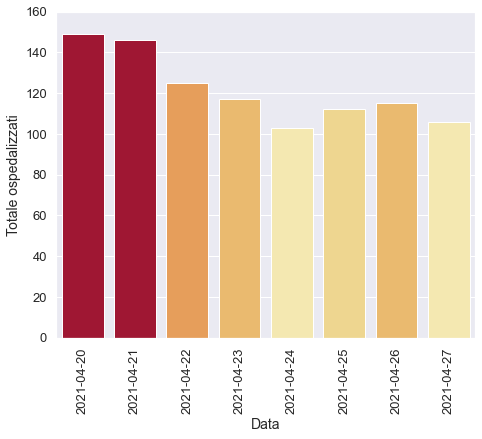

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

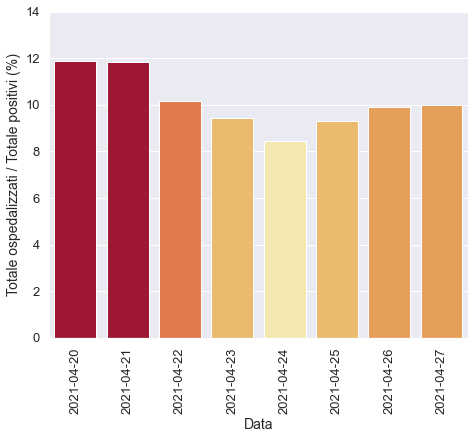

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

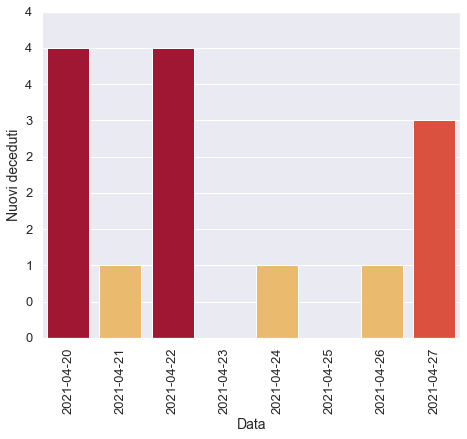

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

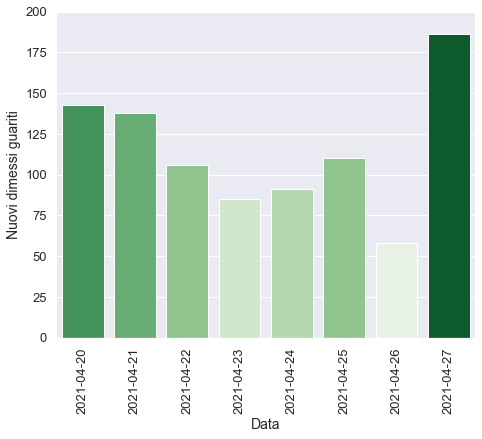

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)